In [1]:
import gensim
from inseq import load_model

from explainitall import viz
from explainitall import dl
from explainitall import interp

In [2]:
def load_nlp_model(nlp_model_url):
    nlp_model_path = dl.DownloadManager.load_zip(nlp_model_url)
    return gensim.models.KeyedVectors.load_word2vec_format(nlp_model_path, binary=True)

# 'ID': 180
# 'Размер вектора': 300
# 'Корпус': 'Russian National Corpus'
# 'Размер словаря': 189193
# 'Алгоритм': 'Gensim Continuous Bag-of-Words'
# 'Лемматизация': True

nlp_model = load_nlp_model ('http://vectors.nlpl.eu/repository/20/180.zip')

In [3]:
def load_gpt_model(gpt_model_name):
    return load_model(model=gpt_model_name,
                           attribution_method="integrated_gradients")

# 'Фреймворк': 'transformers'
# 'Тренировочные токены': '80 млрд'
# 'Размер контекста': 2048

gpt_model = load_gpt_model("sberbank-ai/rugpt3small_based_on_gpt2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
clusters_discr = [
    {'name': 'Животные', 'centroid': ['собака', 'кошка', 'заяц'], 'top_k': 140},
    {'name': 'Лекарства', 'centroid': ['уколы', 'таблетки', 'микстуры'], 'top_k': 160},
    {'name': 'Болезни', 'centroid': ['простуда', 'орви', 'орз', 'грипп'], 'top_k': 20},
    {'name': 'Аллергия', 'centroid': ['аллергия'], 'top_k': 20}
]

explainer = interp.ExplainerGPT2(gpt_model=gpt_model, nlp_model=nlp_model)


expl_data = explainer.interpret(
    input_texts='у кошки грипп и аллергия на антибиотбиотики вопрос: чем лечить кошку? ответ:',
    generated_texts='лечичичичите ее уколами',
    clusters_description=clusters_discr,
    batch_size=50,
    steps=34,
    # max_new_tokens=19
)

Attributing with integrated_gradients...: 100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:19<00:00,  2.39s/it]


In [5]:
# ==============слова==============

In [6]:
# Карта важности слов
expl_data.word_imp_df

,Tokens,лечичичичите,ее,уколами
0,у,0.045573,0.036038,0.043051
1,кошки,0.033284,0.020359,0.038192
2,грипп,0.041395,0.025435,0.058741
3,и,0.031327,0.014889,0.029003
4,аллергия,0.046335,0.023233,0.057812
5,на,0.041478,0.014798,0.032994
6,антибиотбиотики,0.063760,0.030294,0.044789
7,вопрос,0.066805,0.034615,0.031829
8,:,0.045950,0.022795,0.026995
9,чем,0.059181,0.025347,0.037235


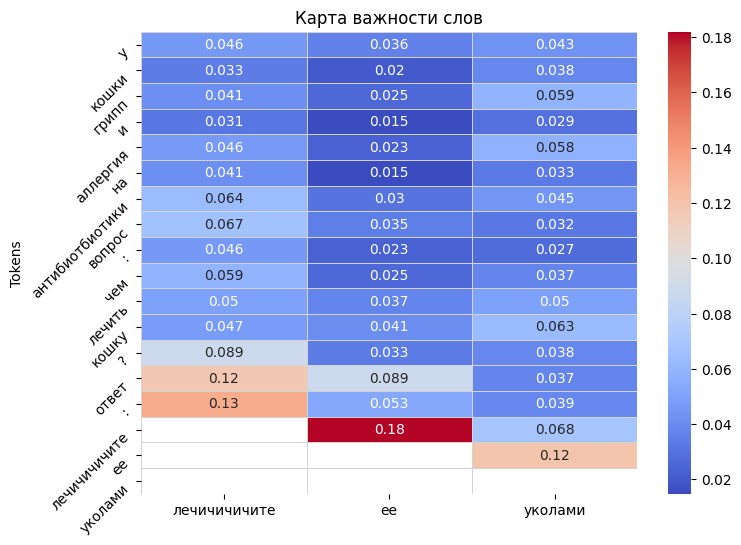

In [7]:
# Тепловая карта важности слов
expl_data.show_word_imp_heatmap()

In [8]:
# Карта важности слов, нормированная
expl_data.word_imp_norm_df


,Tokens,лечичичичите,ее,уколами
0,у,0.577797,0.337025,0.516084
1,кошки,0.271206,0.063829,0.391402
2,грипп,0.473941,0.123004,0.801882
3,и,0.228161,0.027520,0.182033
4,аллергия,0.595616,0.093885,0.792319
5,на,0.476073,0.027101,0.264627
6,антибиотбиотики,0.839842,0.206948,0.559041
7,вопрос,0.853875,0.302365,0.238876
8,:,0.586679,0.088744,0.146994
9,чем,0.806115,0.121727,0.367003


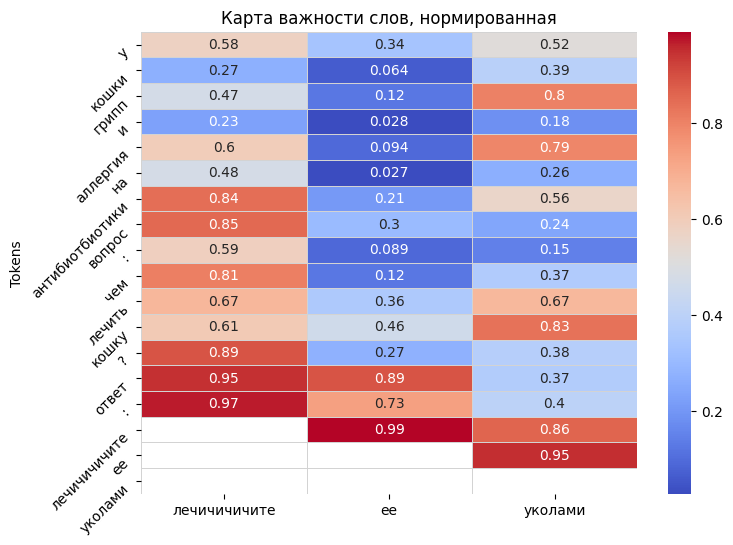

In [9]:
# Тепловая карта важности слов, нормированная
expl_data.show_word_imp_norm_heatmap()

In [10]:
# ==============кластеры==============

In [11]:
# Карта важности кластеров
expl_data.cluster_imp_df

,Tokens,unnamed,unnamed,Лекарства
0,unnamed,0.577797,0.337025,0.516084
1,Животные,0.271206,0.063829,0.391402
2,Болезни,0.473941,0.123004,0.801882
3,unnamed,0.228161,0.027520,0.182033
4,Аллергия,0.595616,0.093885,0.792319
5,unnamed,0.476073,0.027101,0.264627
6,unnamed,0.839842,0.206948,0.559041
7,unnamed,0.853875,0.302365,0.238876
8,unnamed,0.586679,0.088744,0.146994
9,unnamed,0.806115,0.121727,0.367003


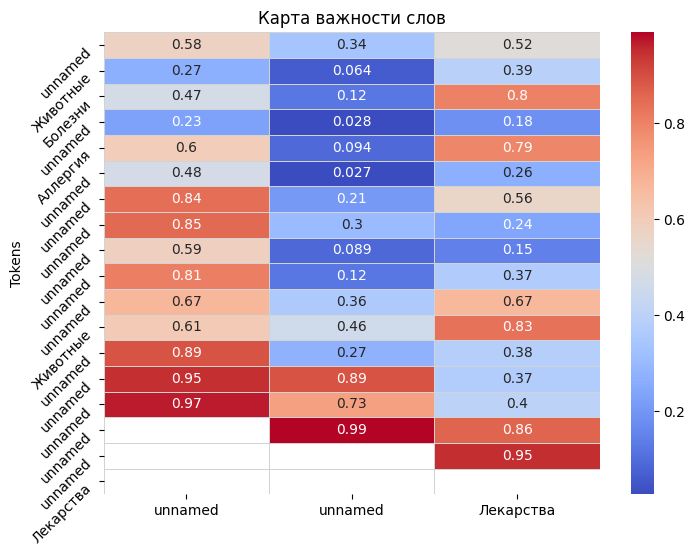

In [12]:
# Тепловая карта важности кластеров
expl_data.show_cluster_imp_heatmap()

In [13]:
# Карта важности кластеров, группированная
print(expl_data.cluster_imp_aggr_df)

      Tokens  Лекарства
0   Аллергия   0.792319
1    Болезни   0.801882
2   Животные   1.224217
3  Лекарства   0.000000


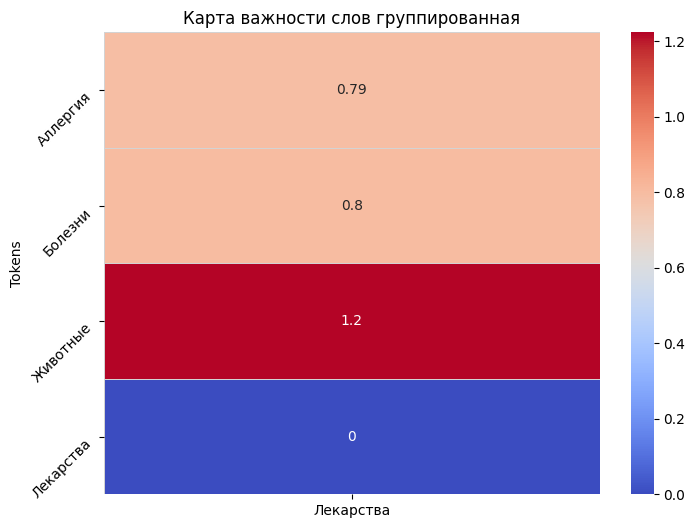

In [14]:
# Тепловая карта важности кластеров, группированная
expl_data.show_cluster_imp_aggr_heatmap()

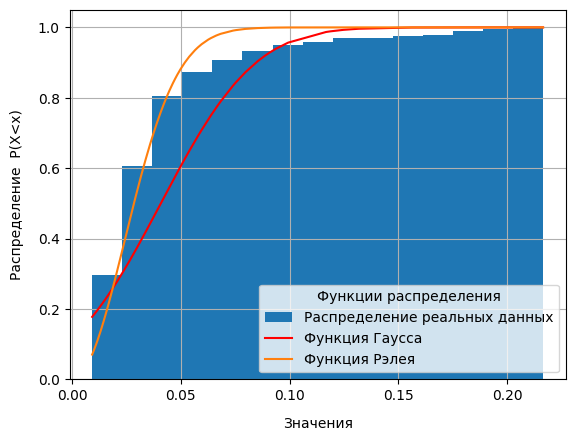

In [15]:
# Гистограмма распределения
viz.show_distribution_histogram(expl_data.attributions.array)

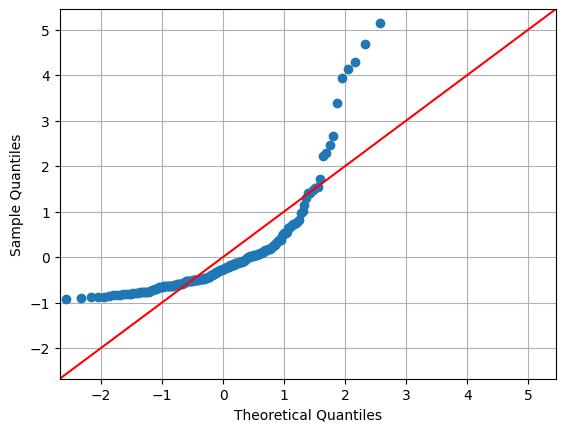

In [16]:
# График распределения
viz.show_distribution_plot(expl_data.attributions.array)